In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go # for fancy interactive plot
from transformers import pipeline

In [45]:
sentiment_pl = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [6]:
# Load the two data sets needed

facetPlotData = pd.read_csv('facetPlotData.csv')
df = pd.read_csv('fullEmotionData.csv', encoding='utf_8') # apostrophes aren't being read correctly
# Pandas reads date as string, cast to datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
facetPlotData['date'] = pd.to_datetime(facetPlotData['date'], format='%Y-%m-%d')
facetPlotData.shape # Should be (3000, 4) 

(3000, 4)

In [9]:
df.head(2)

,file,text_oba,text_wsj,text_nyt,emo_oba,emo_nyt,emo_wsj,date,obafear,obaanger,...,wsjfear,wsjanger,wsjtrust,wsjsurprise,wsjpositive,wsjnegative,wsjsadness,wsjdisgust,wsjjoy,wsjanticipation
0,2008-06-04-ObamaNomination.txt,Thank you....Thank you. What a -- What a wonde...,Sen. Barack Obama captured enough convention d...,Senator Barack Obama claimed the Democratic pr...,<nrclex.NRCLex object at 0x7f09f2a0eda0>,<nrclex.NRCLex object at 0x7f09e5416260>,<nrclex.NRCLex object at 0x7f09e2782260>,2008-06-04,0.095798,0.055462,...,0.051282,0.036630,0.168498,0.047619,0.326007,0.095238,0.054945,0.025641,0.106227,0.087912
1,2008-11-05-ObamaElected.txt,"Hello, Chicago.\r\n\r\nIf there is anyone out ...",Sen. Barack Obama was elected the nation's fir...,Barack Hussein Obama was elected the 44th pres...,<nrclex.NRCLex object at 0x7f09f2a0db10>,<nrclex.NRCLex object at 0x7f09e5416350>,<nrclex.NRCLex object at 0x7f09e2782350>,2008-11-05,0.060000,0.037778,...,0.079114,0.063291,0.175633,0.049051,0.216772,0.140823,0.068038,0.030063,0.071203,0.106013


In [79]:
meansents = []
for text in df['text_oba']:
    hfsent = sentiment_pl([sentence.strip() for sentence in text.split('.') if len(sentence)>2])
    # hfsent is a list of dictionaries, one for each sentence. Find the mean for the whole document
    mean = np.mean([ value[1] if key[1]=='POSITIVE' else -1*value[1] for key, value in (dictnry.items() for dictnry in hfsent) ])
    meansents.append(mean)


In [85]:
# Find index of maximum
maxidx = max( (v, i) for i, v in enumerate(meansents) )[1]
df['file'][maxidx]

'2016-02-16-ScaliaDies.txt'

In [88]:
meandf = pd.DataFrame(meansents)

<AxesSubplot: >

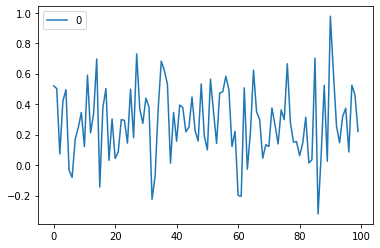

In [89]:
meandf.plot()

In [44]:
# Returns some info on downloaded hf models so they can be deleted
import glob
import json
import re
from collections import OrderedDict 
from transformers import TRANSFORMERS_CACHE
 
metaFiles = glob.glob(TRANSFORMERS_CACHE + '/*.json')
modelRegex = "huggingface\.co\/(.*)(pytorch_model\.bin$|resolve\/main\/tf_model\.h5$)"

cachedModels = {}
cachedTokenizers = {}
for file in metaFiles:
     with open(file) as j:
         data = json.load(j)
         isM = re.search(modelRegex, data['url'])
         if isM:
             cachedModels[isM.group(1)[:-1]] = file
         else:
             cachedTokenizers[data['url'].partition('huggingface.co/')[2]] = file

cachedTokenizers = OrderedDict(sorted(cachedTokenizers.items(), key=lambda k: k[0]))
[print(key,'\n', value, '\n\n') for key, value in cachedTokenizers.items()];

distilbert-base-uncased-finetuned-sst-2-english/resolve/main/config.json 
 C:\Users\peter/.cache\huggingface\transformers\4e60bb8efad3d4b7dc9969bf204947c185166a0a3cf37ddb6f481a876a3777b5.9f8326d0b7697c7fd57366cdde57032f46bc10e37ae81cb7eb564d66d23ec96b.json 


distilbert-base-uncased-finetuned-sst-2-english/resolve/main/tokenizer_config.json 
 C:\Users\peter/.cache\huggingface\transformers\d44ec0488a5f13d92b3934cb68cc5849bd74ce63ede2eea2bf3c675e1e57297c.627f9558061e7bc67ed0f516b2f7efc1351772cc8553101f08748d44aada8b11.json 


distilbert-base-uncased-finetuned-sst-2-english/resolve/main/vocab.txt 
 C:\Users\peter/.cache\huggingface\transformers\83261b0c74c462e53d6367de0646b1fca07d0f15f1be045156b9cf8c71279cc9.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99.json 


google/pegasus-xsum/resolve/main/config.json 
 C:\Users\peter/.cache\huggingface\transformers\f8db793080242073e939bf4bc066830a677ca5e1c2d3aa1fc2a79fe733ccf3c9.149318290a6d6f03f34bb735260994b16b4a7c8609973a4abc8e9